# <span style="color:red">Homework Solution 2</span>

## FINM 37400 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# 1 HBS Case: Fixed-Income Arbitrage in a Financial Crisis (A): US Treasuries in November 2008

## Data
* Use the data file `treasury_ts_2015-08-15.xlsx`.
* Examine the treasure issues with `kytreasno` of `204046` and `204047`. These are the bond and note (respectively) which mature on 2015-08-15.
* Look at the data on 2008-11-04.

## 1.1 The situation

Make a chart comparing the issues in the following features, (as of Nov 4, 2008.)
* coupon rate
* bid
* ask
* accrued interest
* dirty price
* duration (quoted in years, not days, assuming 365.25 days per year.)
* modified duration
* YTM

## 1.2 Hedge Ratio

Suppose you are building a trade to go long $n_i$ bonds (`204046`) and short $n_j$ notes (`204047`).

We can find an equation for $n_j$ in terms of $n_i$ such that the total holdings will have duration equal to zero. (Having zero duration also means have zero dollar duration, if helpful.)

Notation:
* $n_i$: number of bonds purchased (or sold)
* $D_i$: duration of bond $i$
* $D_{\$,i}$: dollar duration of bond $i$, equal to $p_iD_i$

If we want the total duration of our holdings to be zero, then we need to size the trade such that $n_i$ and $n_j$ satisfy,

$$0 = n_iD_{\$,i} + n_jD_{\$,j}$$

$$n_j = -n_i\frac{D_{\$,i}}{D_{\$,j}}$$

Suppose you will use \\$1mm of capital, leveraged 50x to buy \\$50mm of the bonds (`204046`).

Use the ratio above to short a number of notes (`204047`) to keep zero duration.

Report the number of bonds and notes of your position, along with the total dollars in the short position.

## 1.3 Profit Opportunity

Using the concept of **modified duration**, how much profit or loss (PnL) would you expect to make for every basis point of convergence in the spread? Specifically, assume the convergence is symmetric: the bond's (`204046`) ytm goes down 0.5bp and the note (`204047`) ytm goes up 0.5bp.

Describe the PnL you would expect to achieve on your position should this happen. Specify the PnL of the long position, the short position, and the net total.

Suppose the spread in YTM between the two securities disappears, due to a symmetric move of roughly ~17bps in each security's YTM. What is the PnL? (This is just a linearly scaling of your prior answer for a 1bp convergence.) 


## 1.4 Result in 2008

Calculate the profit (or loss) on the position on the following two dates:
* 2008-11-25
* 2008-12-16

To calculate the pnl on each date, simply use the prices of the securities on those dates along with your position sizes, ($n_i, n_j$). No coupon is being paid in November or December, so all you need is the "dirty" price on these two dates.

Does the pnl make sense (approximately) given your results in 1.3 with regard to the sensitivity of pnl to moves in the YTM spread?

## 1.5 Examining the Trade through June 2009

Calculate the pnl of the trade for the following dates:
* 2009-01-27
* 2009-03-24
* 2009-06-16

Did the trade do well or poorly in the first six months of 2009?

Calculate the YTM spreads on these dates. Does the YTM spread correspond to pnl roughly as we would expect based on the calculation in 1.3?

***

# <span style="color:red">Solution 1</span>

See separate notebook discussing the case.

***

# 2 Hedging Duration

Use data from `../data/treasury_ts_duration_2024-10-31.xlsx`.

The file contains time-series information on two treasuries. Observe the info of the securities with the following code:


In [1]:
import pandas as pd

In [2]:
QUOTE_DATE = '2024-10-31'
filepath = f'../data/treasury_ts_duration_{QUOTE_DATE}.xlsx'

data = pd.read_excel(filepath,sheet_name='database')
data_info =  data.drop_duplicates(subset='KYTREASNO', keep='first').set_index('KYTREASNO')
data_info[['type','issue date','maturity date','cpn rate']]

,type,issue date,maturity date,cpn rate
KYTREASNO,,,,
207391,note,2019-08-15,2029-08-15,1.625
207392,bond,2019-08-15,2049-08-15,2.250


You will largely focus on the sheets which give the timeseries of prices and durations for each of the two securities, as shown in the following code.

In [3]:
SHEET_PRICE = 'price'
SHEET_DURATION = 'duration'
INDEX_NAME = 'quote date'

price = pd.read_excel(filepath,sheet_name=SHEET_PRICE).set_index(INDEX_NAME)
duration = pd.read_excel(filepath,sheet_name=SHEET_DURATION).set_index(INDEX_NAME)

display(price)
display(duration)

,207391,207392
quote date,,
2019-08-09,98.882812,99.789062
2019-08-12,99.796875,102.554688
2019-08-13,99.281250,101.867188
2019-08-14,100.406250,105.179688
2019-08-15,100.882812,106.234375
...,...,...
2024-11-22,88.740234,63.722656
2024-11-25,89.287109,65.378906
2024-11-26,89.214844,65.175781


,207391,207392
quote date,,
2019-08-09,9.289497,22.000102
2019-08-12,9.285468,22.118496
2019-08-13,9.280314,22.084308
2019-08-14,9.282750,22.228549
2019-08-15,9.282163,22.270910
...,...,...
2024-11-22,4.539445,17.205511
2024-11-25,4.531983,17.312267
2024-11-26,4.529132,17.295472


### 2.1.

Suppose you have a portfolio of `10,000` USD long in security `207391` on the first day of the sample.

If you want to manage interest rate exposure using duration, how large of a short position should you hold in `207392`?

### 2.2.

Step through the time-series, doing the following:

* Starting at the end of the first day, set the hedged position according to the relative given durations.
* Use the second day's price data to evaluate the net profit or loss of the hedged position.
* Reset the the hedged position using the end-of-second-day durations. Again fix the long position of security `207391` to be `10,000`.
* Repeat throughout the timeseries.

Calculate the daily profit and loss (PnL) for the
* dynamically hedged position constructed above.
* long-only position, (still at `10,000` throughout.)

(You might check to verify that the net duration is zero at all dates.)

Report...
* the cumulative PnL of both strategies via a plot.
* the (daily) mean, standard deviation, min, and max of the PnL in a table.

### 2.3.

Give two reasons that the daily PnL is not always zero for the hedged position given that we have perfectly hedged the duration.

### 2.4.
The PnL above doesn't account for the coupons.

Calculate a dataframe indexed by dates with columns for the two treasuries with values of coupon payments. 
* Recall that the stated coupon rate is semiannual, so at any give coupon date, it pays half the stated rate.
* Figure out the coupon dates by using the `data` tab and looking for dates where `acc int` goes down. Recall that accrued interest measures the portion of the coupon period that has passed. So when this resets, it is because the coupon has been paid.

Report the first 5 dates that a coupon is paid (by either bond).

### 2.5.
Account for the coupons in the PnL calculations of `2.2`. Report the updated PnL in a plot and a table, similar to the reporting in `2.2`.

***

# <span style="color:red">Solution 2</span>

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

##### <span style="color:red">Build hedged position</span>

In [5]:
SIZE = 10000
IDLONG = 207391
IDSHORT = 207392

In [6]:
position = pd.DataFrame(index=duration.index, dtype=float)

position['long'] = SIZE / price[IDLONG]
position['hedge ratio'] = (duration[IDLONG] / duration[IDSHORT]) * (price[IDLONG] / price[IDSHORT])
position['short'] = - position['hedge ratio'] * position['long']
position[['long ($)','short ($)']] = position[['long','short']] * price[[IDLONG,IDSHORT]].values

position['net ($)'] = position[['long ($)','short ($)']].sum(axis=1)
wts = position[['long ($)','short ($)']].div(position[['long ($)','short ($)']].sum(axis=1),axis=0)

##### <span style="color:red">Check that duration is indeed hedged as of end of day</span>

In [7]:
position['duration'] = (wts * duration[[IDLONG,IDSHORT]].values).sum(axis=1)
position['duration'].describe().to_frame().T.style.format('{:.1%}')

,count,mean,std,min,25%,50%,75%,max
duration,133000.0%,0.0%,0.0%,-0.0%,-0.0%,0.0%,0.0%,0.0%


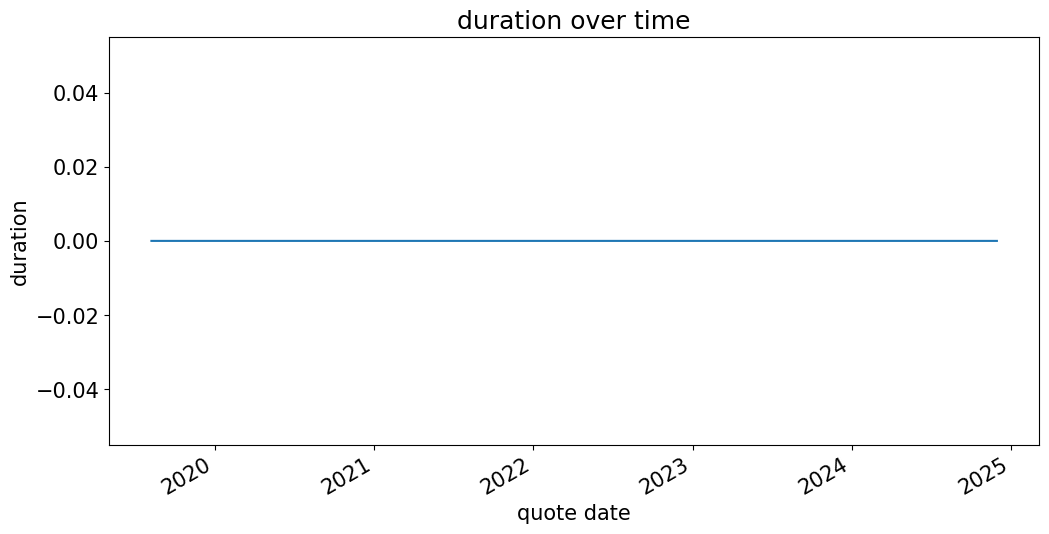

In [8]:
position['duration'].round(4).plot()
plt.ylabel('duration')
plt.title('duration over time')
plt.show()

#### <span style="color:red">Based on position at end of $t$, calculate  profit & loss at $t+1$</span>

Note that this is not the true **profit** given that we are ignoring the coupons.

In [9]:
position[['long ($) realized','short ($) realized']] = \
    position[['long','short']] * price[[IDLONG,IDSHORT]].shift(-1).values

position[['long p&l','short p&l']] = \
    position[['long ($) realized','short ($) realized']] - position[['long ($)','short ($)']].values

position['profit hedged'] = position[['long p&l','short p&l']].sum(axis=1)

#### <span style="color:red">Compare to profit of holding position unhedged</span>

In [10]:
position['profit'] = price[IDLONG].diff() * position['long'].shift()

#### <span style="color:red">Add in the coupon payments to the total P&L</span>

In [11]:
cpns = data.pivot_table(index='quote date',columns='KYTREASNO',values='cpn rate').dropna()

accint = data.pivot_table(index='quote date',columns='KYTREASNO',values='accrued int').dropna()
dates_cpns = accint[(accint.diff(axis=0)<0).all(axis=1)].index.to_list()


cpn_position_hedged = (position[['long','short']].shift() * cpns[[IDLONG,IDSHORT]].values).sum(axis=1)
cpn_position_unhedged = position['long'].shift() * cpns[IDLONG].values
position.loc[dates_cpns,'profit hedged'] += cpn_position_hedged.loc[dates_cpns].values
position.loc[dates_cpns,'profit'] += cpn_position_unhedged.loc[dates_cpns].values

In [12]:
position

,long,hedge ratio,short,long ($),short ($),net ($),duration,long ($) realized,short ($) realized,long p&l,short p&l,profit hedged,profit
quote date,,,,,,,,,,,,,
2019-08-09,101.129810,0.418413,-42.314047,10000.0,-4222.479083,5777.520917,3.552714e-15,10092.438967,-4339.503869,92.438967,-117.024786,-24.585820,NaN
2019-08-12,100.203538,0.408517,-40.934802,10000.0,-4198.055835,5801.944165,0.000000e+00,9948.332550,-4169.913158,-51.667450,28.142676,-23.524773,92.438967
2019-08-13,100.723953,0.409555,-41.251958,10000.0,-4202.220951,5797.779049,-3.552714e-15,10113.314448,-4338.868062,113.314448,-136.647111,-23.332664,-51.667450
2019-08-14,99.595394,0.398652,-39.703946,10000.0,-4176.048586,5823.951414,0.000000e+00,10047.463430,-4217.923841,47.463430,-41.875255,5.588175,113.314448
2019-08-15,99.124913,0.395789,-39.232518,10000.0,-4167.842047,5832.157953,5.329071e-15,9975.993185,-4110.525790,-24.006815,57.316257,33.309442,47.463430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,112.688456,0.367419,-41.403909,10000.0,-2638.367073,7361.632927,1.776357e-15,10061.626499,-2706.942298,61.626499,-68.575225,-6.948725,-1.320393
2024-11-25,111.998250,0.357508,-40.040242,10000.0,-2617.787204,7382.212796,-1.776357e-15,9991.906379,-2609.654032,-8.093621,8.133172,0.039551,61.626499
2024-11-26,112.088971,0.358454,-40.178741,10000.0,-2618.680845,7381.319155,8.881784e-16,10024.957304,-2637.985475,24.957304,-19.304630,5.652675,-8.093621


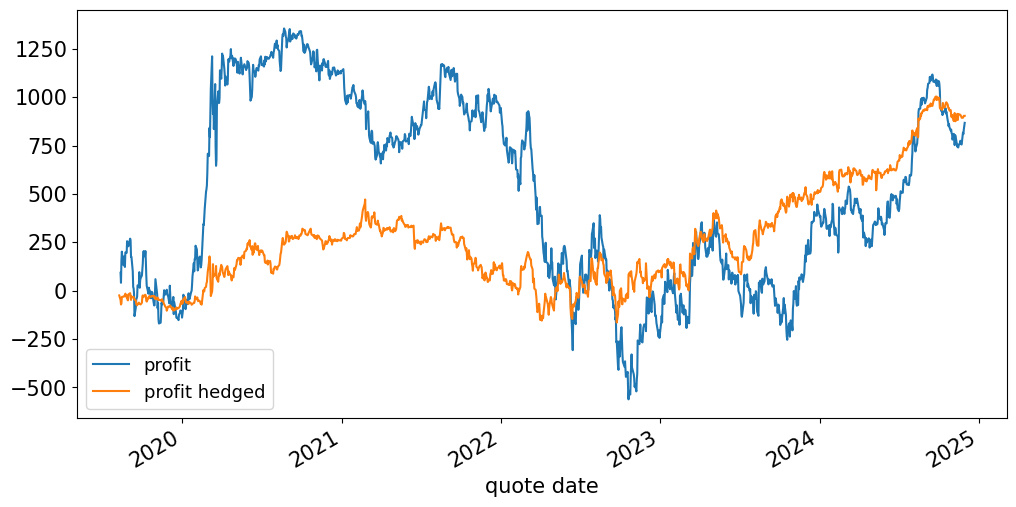

In [13]:
position[['profit','profit hedged']].cumsum().plot();

In [14]:
position[['profit','profit hedged']].describe().drop(index=['count']).style.format('${:,.2f}')

,profit,profit hedged
mean,$0.65,$0.68
std,$46.65,$22.19
min,$-321.20,$-98.34
25%,$-26.35,$-10.78
50%,$-1.32,$0.00
75%,$25.50,$10.92
max,$276.27,$118.43


***

## Other Statistics of the Trade

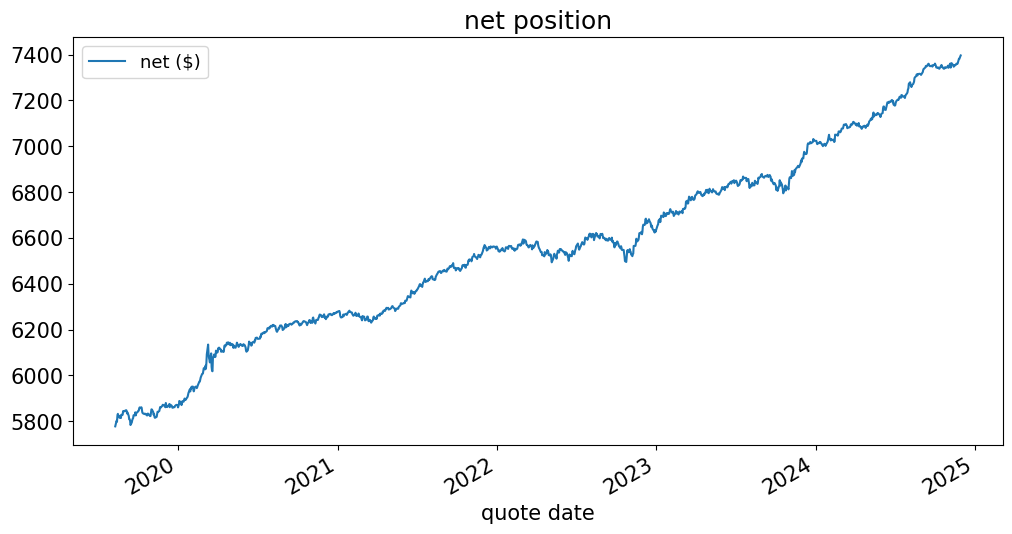

In [15]:
position[['net ($)']].plot()
plt.title('net position')
plt.show()

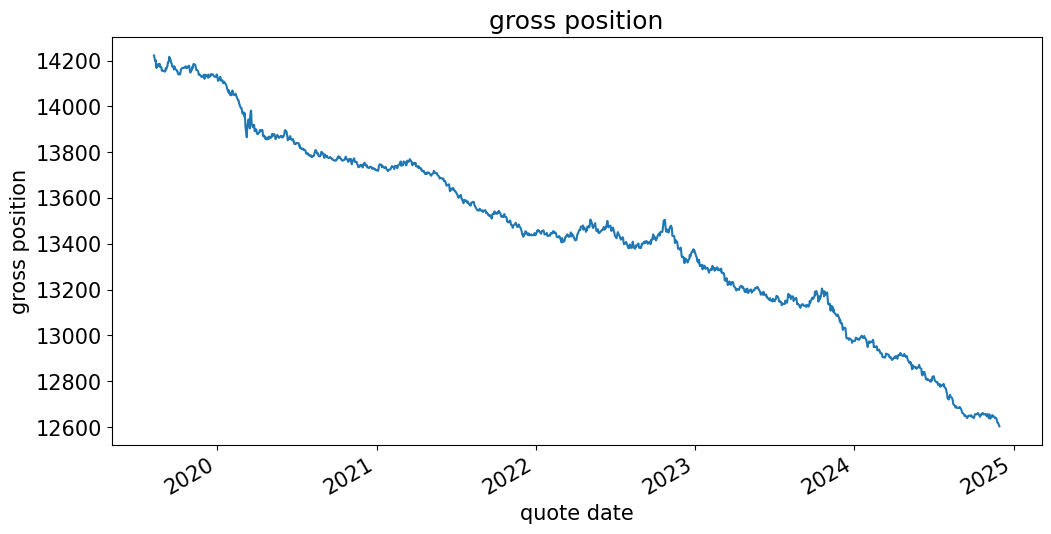

In [16]:
position[['long ($)','short ($)']].abs().sum(axis=1).plot()
plt.ylabel('gross position')
plt.title('gross position')
plt.show()

***